# GOMYCODE PROJECT: LIFE EXPECTANCY (WHO) PREDICTION MODELLED USING STREAMLIT APP
I will be working with a **World Health Organisation (WHO)** dataset, which contains indicators on global health trends, such as life expectancy, mortality rates, diseases, etc. 

### Objective
- The dataset includes health-related statistics for countries over time (e.g life expectancy, and other health indicators)
- Display visualizations like prediction vs actual values and other charts.
- Trains the model and predicts life expectancy using Linear Regression, Random Forest Regressor, Support Vector Machine (SVM) and Gradient Boosting  Regressor. In the end, i will evaluate the models using common metrics like Mean Absolute Error (MAE), R², Visualization,Training/Testing Accuracy, then select the best model based on these metrics.
- Deploy the model using Streamlit to allow the user to input health data (e.g adult_mortality, infant_deaths, hiv_aids, polio, alcohol etc.) 

### Steps to build the Project:

1. **Obtain the WHO Dataset**.
2. **Preprocess and Clean the Data**.
3. **Visualize the Data**.
4. **Train a Model** 
5. **Deploy the Model using Streamlit**.

### Dataset
I'll use the Life Expectancy (WHO) dataset from Kaggle, which contains statistical analysis on factors influencing Life Expectancy.

### Dataset URL: https://www.kaggle.com/datasets/kumarajarshi/life-expectancy-who 

## PRESENTED BY : OGUNTUGA DAMILARE ACCA, FCCSA, FMVA, DATA SCIENTIST

### Step 1: Load and Pre-process the Data

In [3]:
import pandas as pd
import numpy as np
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt

### Load life expectancy (WHO) dataset
This function loads the dataset from the provided file path.

In [6]:
df = pd.read_csv(r"C:\Users\Oguntuga\Downloads\Life Expectancy Data.csv")

### Explore data

In [9]:
# Display the first few rows of the dataset
df.head()

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,HIV/AIDS,GDP,thinness 1-19 years,BMI,Life expectancy,Schooling,Income composition of resources,Population
0,Afghanistan,2023,Developing,263.0,62,0.01,71.279624,65.0,1154,83,6.0,8.16,0.1,584.259210,17.2,19.1,65.0,10.1,0.479,33736494.0
1,Afghanistan,2022,Developing,271.0,64,0.01,73.523582,62.0,492,86,58.0,8.18,0.1,612.696514,17.5,18.6,59.9,10.0,0.476,327582.0
2,Afghanistan,2021,Developing,268.0,66,0.01,73.219243,64.0,430,89,62.0,8.13,0.1,631.744976,17.7,18.1,59.9,9.9,0.470,31731688.0
3,Afghanistan,2020,Developing,272.0,69,0.01,78.184215,67.0,2787,93,67.0,8.52,0.1,669.959000,17.9,17.6,59.5,9.8,0.463,3696958.0
4,Afghanistan,2019,Developing,275.0,71,0.01,7.097109,68.0,3013,97,68.0,7.87,0.1,63.537231,18.2,17.2,59.2,9.5,0.454,2978599.0


In [11]:
# Display the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Adult Mortality                  2928 non-null   float64
 4   infant deaths                    2938 non-null   int64  
 5   Alcohol                          2744 non-null   float64
 6   percentage expenditure           2938 non-null   float64
 7   Hepatitis B                      2385 non-null   float64
 8   Measles                          2938 non-null   int64  
 9   under-five deaths                2938 non-null   int64  
 10  Polio                            2919 non-null   float64
 11  Total expenditure                2712 non-null   float64
 12  HIV/AIDS            

In [13]:
# Display the statistical summary of the dataset
df.describe()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,under-five deaths,Polio,Total expenditure,HIV/AIDS,GDP,thinness 1-19 years,BMI,Life expectancy,Schooling,Income composition of resources,Population
count,2938.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2938.000000,2919.000000,2712.00000,2938.000000,2490.000000,2904.000000,2904.000000,2928.000000,2775.000000,2771.000000,2.286000e+03
mean,2007.997958,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,42.035739,82.550188,5.93819,1.742103,7483.158469,4.839704,38.321247,69.224932,11.992793,0.627551,1.275338e+07
std,4.987488,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,160.445548,23.428046,2.49832,5.077785,14270.169342,4.420195,20.044034,9.523867,3.358920,0.210904,6.101210e+07
min,2000.000000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,0.000000,3.000000,0.37000,0.100000,1.681350,0.100000,1.000000,36.300000,0.000000,0.000000,3.400000e+01
25%,2004.000000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,0.000000,78.000000,4.26000,0.100000,463.935626,1.600000,19.300000,63.100000,10.100000,0.493000,1.957932e+05
50%,2008.000000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,4.000000,93.000000,5.75500,0.100000,1766.947595,3.300000,43.500000,72.100000,12.300000,0.677000,1.386542e+06
75%,2012.000000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,28.000000,97.000000,7.49250,0.800000,5910.806335,7.200000,56.200000,75.700000,14.300000,0.779000,7.420359e+06
max,2023.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,2500.000000,99.000000,17.60000,50.600000,119172.741800,27.700000,87.300000,89.000000,20.700000,0.948000,1.293859e+09


### Pre-process and Clean the Data

### Check for Missing Values
Identify missing values in the dataset and decide whether to input or drop them.

In [17]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
under-five deaths                    0
Polio                               19
Total expenditure                  226
HIV/AIDS                             0
GDP                                448
thinness 1-19 years                 34
BMI                                 34
Life expectancy                     10
Schooling                          163
Income composition of resources    167
Population                         652
dtype: int64

### Handle Missing Data
I will input missing data using the median 

In [20]:
df['Adult Mortality'] = df['Adult Mortality'].fillna(df['Adult Mortality'].median())
df['Alcohol'] = df['Alcohol'].fillna(df['Alcohol'].median())
df['Hepatitis B'] = df['Hepatitis B'].fillna(df['Hepatitis B'].median())
df['Polio'] = df['Polio'].fillna(df['Polio'].median())
df['Total expenditure'] = df['Total expenditure'].fillna(df['Total expenditure'].median())
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
df['thinness 1-19 years'] = df['thinness 1-19 years'].fillna(df['thinness 1-19 years'].median())
df['BMI'] = df['BMI'].fillna(df['BMI'].median())
df['Life expectancy'] = df['Life expectancy'].fillna(df['Life expectancy'].median())
df['Population'] = df['Population'].fillna(df['Population'].median())
df['Income composition of resources'] = df['Income composition of resources'].fillna(df['Income composition of resources'].median())
df['Schooling'] = df['Schooling'].fillna(df['Schooling'].median())

In [22]:
### Re-check missing values
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
under-five deaths                  0
Polio                              0
Total expenditure                  0
HIV/AIDS                           0
GDP                                0
thinness 1-19 years                0
BMI                                0
Life expectancy                    0
Schooling                          0
Income composition of resources    0
Population                         0
dtype: int64

In [24]:
# Check for duplicate
df.duplicated().sum()

0

### Check Data Types
To ensure that each column is in the appropriate format (e.g., numerical values for continuous features like life expectancy).

In [27]:
df.dtypes

Country                             object
Year                                 int64
Status                              object
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
HIV/AIDS                           float64
GDP                                float64
thinness 1-19 years                float64
BMI                                float64
Life expectancy                    float64
Schooling                          float64
Income composition of resources    float64
Population                         float64
dtype: object

### Feature Encoding
For any categorical variables (such as the 'Country', 'Status' column), encode them as numerical features.

In [30]:
df['Country'] = df['Country'].astype('category').cat.codes
df['Status'] = df['Status'].astype('category').cat.codes

### Step 2: Visualize the Data
### Basic Data Exploration
Matplotlib and seaborn will be used for visualizations to understand the relationships between features, such as life expectancy and health indicators.

In [33]:
# To display a plot directly below the code cell that produces them, rather than in a separate window
%matplotlib inline

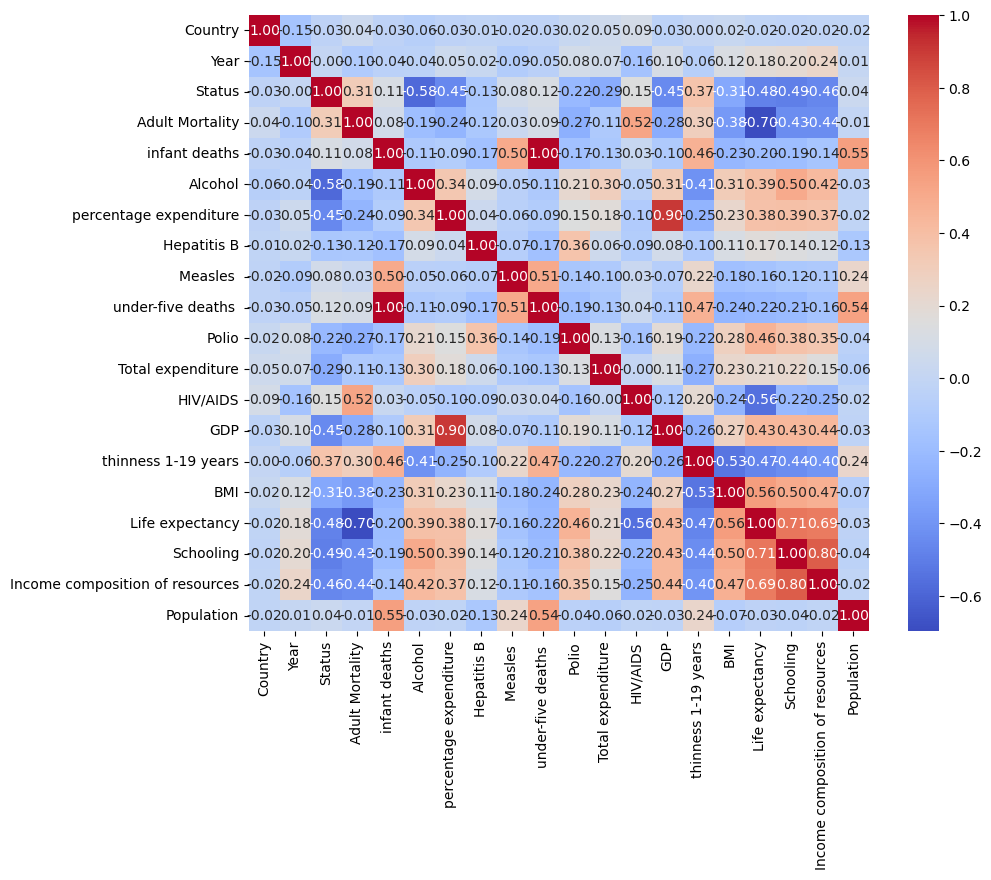

In [35]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

### Life Expectancy vs. Other Indicators
Create scatter plots to visualize relationships between life expectancy and other indicators, such as Adult Mortality, Infant deaths, HIV/AIDS, Polio, Alcohol , etc.

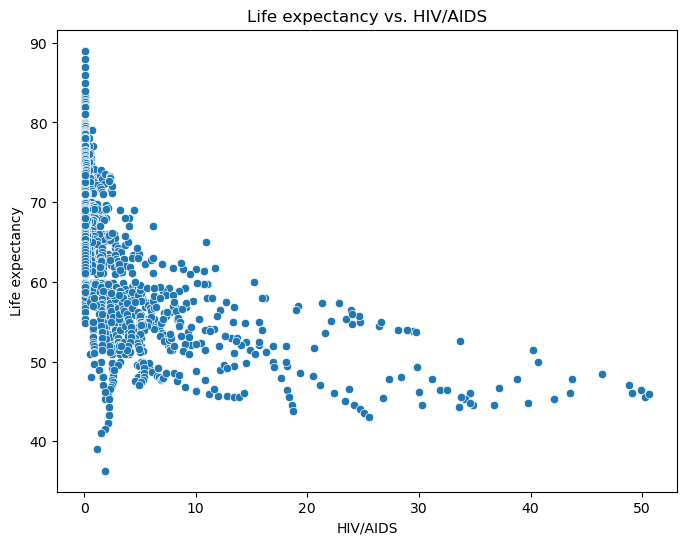

In [38]:
### Life expectancy vs. HIV/AIDS

plt.figure(figsize=(8, 6))
sns.scatterplot(x='HIV/AIDS', y='Life expectancy', data=df)
plt.title('Life expectancy vs. HIV/AIDS')
plt.show()

### Select Features
Selecting the features to predict life expectancy. For simplicity, i will start with a small set of features.

In [41]:
# Select features and target variable
X = df[['Adult Mortality', 'infant deaths', 'HIV/AIDS', 'Polio', 'Alcohol']]  # Example features
y = df['Life expectancy']  # Target variable

### Split the Data
Split the dataset into training and testing sets to evaluate model performance.

In [51]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 3: Train with multiple Model
For each model, i'll evaluate performance using metrics like R², Mean Absolute Error (MAE) and visualization.

### Model 1: Linear Regression

In [53]:
# Train Linear Regression model
# Impute missing values in the training and test sets
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Fit the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_imputed, y_train)

# Predictions on the test set
lr_pred = lr_model.predict(X_test_imputed)

# Model performance evaluation
lr_mae = mean_absolute_error(y_test, lr_pred)
lr_r2 = r2_score(y_test, lr_pred)

# Print the evaluation metrics
print(f"Linear Regression MAE: {lr_mae}")
print(f"Linear Regression R²: {lr_r2}")

Linear Regression MAE: 3.842642576113648
Linear Regression R²: 0.6708767822962258


### Model 2: Random Forest Regressor

In [56]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Model performance
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest MAE: {rf_mae:.2f}")
print(f"Random Forest R²: {rf_r2:.2f}")

Random Forest MAE: 1.33
Random Forest R²: 0.95


### Model 3: Support Vector Machine (SVM)

In [59]:
# Train SVM model
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)

# Predictions
svm_pred = svm_model.predict(X_test)

# Model performance
svm_mae = mean_absolute_error(y_test, svm_pred)
svm_r2 = r2_score(y_test, svm_pred)

print(f"SVM MAE: {svm_mae:.2f}")
print(f"SVM R²: {svm_r2:.2f}")

SVM MAE: 3.07
SVM R²: 0.70


### Model 4: Gradient Boosting Machine (GBM)

In [62]:
# Train Gradient Boosting model
gbm_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbm_model.fit(X_train, y_train)

# Predictions
gbm_pred = gbm_model.predict(X_test)

# Model performance
gbm_mae = mean_absolute_error(y_test, gbm_pred)
gbm_r2 = r2_score(y_test, gbm_pred)

print(f"GBM MAE: {gbm_mae:.2f}")
print(f"GBM R²: {gbm_r2:.2f}")

GBM MAE: 1.72
GBM R²: 0.93


### Compare their performance based on Mean Absolute Error (MAE) and R². MAE to measures the average magnitude of the errors in a set of predictions, without considering their direction and R² evaluates the goodness of fit of a regression model
The lower the MAE and the higher the R², the better the model.

In [68]:
# Store model performance in a dictionary
model_performance = {
    'Linear Regression': {'MAE': lr_mae, 'R²': lr_r2},
    'Random Forest': {'MAE': rf_mae, 'R²': rf_r2},
    'SVM': {'MAE': svm_mae, 'R²': svm_r2},
    'GBM': {'MAE': gbm_mae, 'R²': gbm_r2}
}

# Convert to DataFrame for easier comparison
performance_df = pd.DataFrame(model_performance).T
print(performance_df)

                        MAE        R²
Linear Regression  3.842643  0.670877
Random Forest      1.329125  0.953057
SVM                3.074648  0.702395
GBM                1.718528  0.934188


### Random Forest has the lowest MAE and highest R², it would be considered the best model.

### Visualize Model Performance
I will visualize the predicted vs actual values for each model and compare their performances

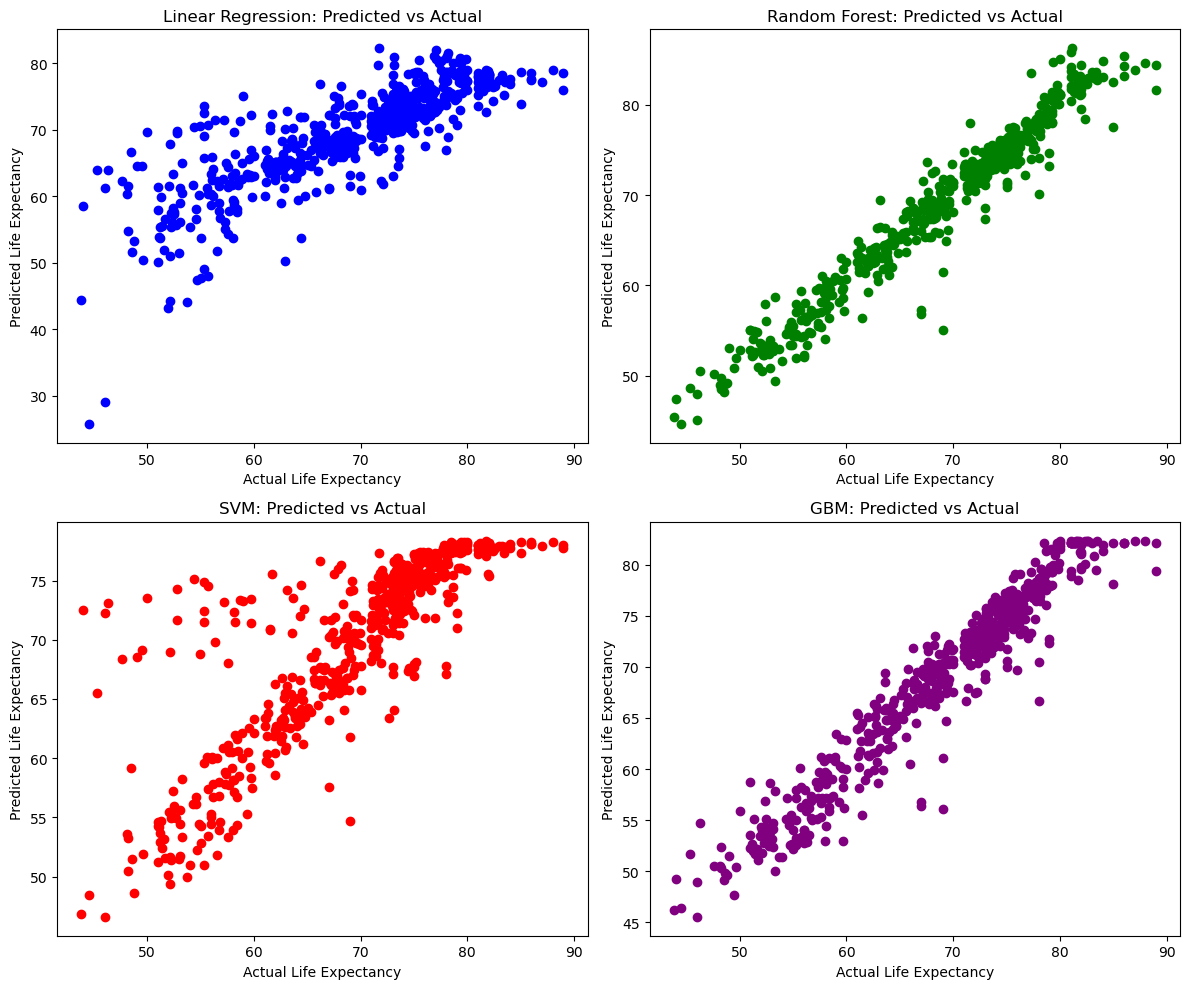

In [72]:
# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Model 1: Linear Regression
axs[0, 0].scatter(y_test, lr_pred, color='blue')
axs[0, 0].set_title('Linear Regression: Predicted vs Actual')
axs[0, 0].set_xlabel('Actual Life Expectancy')
axs[0, 0].set_ylabel('Predicted Life Expectancy')

# Model 2: Random Forest
axs[0, 1].scatter(y_test, rf_pred, color='green')
axs[0, 1].set_title('Random Forest: Predicted vs Actual')
axs[0, 1].set_xlabel('Actual Life Expectancy')
axs[0, 1].set_ylabel('Predicted Life Expectancy')

# Model 3: SVM
axs[1, 0].scatter(y_test, svm_pred, color='red')
axs[1, 0].set_title('SVM: Predicted vs Actual')
axs[1, 0].set_xlabel('Actual Life Expectancy')
axs[1, 0].set_ylabel('Predicted Life Expectancy')

# Model 4: Gradient Boosting
axs[1, 1].scatter(y_test, gbm_pred, color='purple')
axs[1, 1].set_title('GBM: Predicted vs Actual')
axs[1, 1].set_xlabel('Actual Life Expectancy')
axs[1, 1].set_ylabel('Predicted Life Expectancy')

# Show the plots
plt.tight_layout()
plt.show()

### Saving my model

In [75]:
# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

import joblib

# Save the model to a file
joblib.dump(model, 'rf_model.pkl')

print("Model trained and saved successfully!")

Model trained and saved successfully!


### Step 4: Deploying the Best Model Using Streamlit
Now that i have selected the best model, i will use Streamlit to deploy it. Streamlit allows us to build an interactive web application where users can input health data and get predictions.

In [82]:
# Create the file 'Life_Streamlit_App.py' in write mode
with open("Life Expectancy Prediction_Streamlit_App.py", "w") as file:
    
    # Write the necessary Streamlit app code into the file
    file.write("""
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import joblib

# Load your trained model (replace 'path_to_your_model' with your actual path)
rf_model = joblib.load(r'C:\\Users\\Oguntuga\\rf_model.pkl')  # Corrected path with raw string

# Load the dataset (replace with actual data loading)
df = pd.DataFrame({'Country': ['Afghanistan', 'Nigeria', 'USA', 'England', 'Iran', 'Djibouti', 'Somalia']})  # Placeholder data for countries

# Title of the web app
st.title('Life Expectancy Prediction')

# Input fields for health indicators
adult_mortality = st.number_input('Adult Mortality (per capita)', min_value=0.0, max_value=10000.0, value=500.0)
infant_deaths = st.number_input('Infant Deaths (per 1000 live births)', min_value=0.0, max_value=1000.0, value=10.0)
hiv_aids = st.number_input('HIV/AIDS (%)', min_value=0.0, max_value=100.0, value=5.0)
polio = st.number_input('Polio (%)', min_value=0.0, max_value=100.0, value=98.0)
alcohol = st.number_input('Alcohol Consumption (liters per capita)', min_value=0.0, max_value=20.0, value=5.0)
country = st.selectbox('Select Country', df['Country'].unique())

# Prepare input for prediction (no country in input_data for prediction purposes)
input_data = np.array([[adult_mortality, infant_deaths, hiv_aids, polio, alcohol]])

# Make prediction when the button is clicked
if st.button('Predict Life Expectancy'):
    # Use the trained model to make the prediction
    life_expectancy_pred = rf_model.predict(input_data)
    
    # Display the prediction
    st.write(f"Predicted Life Expectancy: {life_expectancy_pred[0]:.2f} years")
    """)